# Introduction


## Colab Notebook Introduction

Welcome to this Colab Notebook. In this session, we closely follow Andrej Karpathy's Neural Networks: Hero to Zero Lecture 2 as presented in the video "The spelled-out intro to language modeling: building makemore". The video provides a comprehensive understanding of building a bigram character level language model. Here, we will implement and dissect the main components discussed in the lecture.

**Main Tasks Covered:**
1. **Understanding Bigram Language Models:** We'll delve into the concept of bigrams and how they can be used to predict sequences of characters in a language model.
2. **Sampling from a Bigram Character Level Language Model:** Learn how to sample from the model using an array of counts and the importance of tensor broadcasting in PyTorch.
3. **Training a Bi-gram Language Model:** We'll go through the process of training our model, evaluating its performance using the negative log likelihood, and implementing model smoothing to handle unseen bigrams.
4. **Neural Network Approach:** We'll introduce a gradient-based neural network approach to the bigram character level language modeling, explaining the forward and backward passes, loss calculation, and weight updates.
5. **Feeding Integers into Neural Networks:** Understand how to prepare data for neural networks, specifically one-hot encoding for integer data, and the softmax operation.
6. **Implementing a Basic Neural Network:** We will construct a basic neural network, understanding its architecture and how it's trained to make predictions.

---

## Our Character-Level Bigram Neural Network

### Introduction

We're building a simple character-level bigram neural network. This model aims to predict the next character in a sequence given a current character.

### Model Architecture

1. **Input Layer:**
   - The network receives a single character as input. We one-hot encode this character, converting it into a binary vector where only the index corresponding to the character is set to 1.
   - Our vocabulary consists of 27 characters (26 letters plus a special character for the start/end of a word).

2. **Weights or Parameters:**
   - The network has a weight matrix `W`, representing the parameters of the network. This matrix is initially randomly initialized.
   - Each neuron in the network has a set of weights corresponding to each input character. Since we have 27 characters in our vocabulary, we have a 27x27 weight matrix.

3. **Output Layer:**
   - The network outputs a probability distribution over the next possible character in the sequence.
   - It does this by performing a linear transformation of the input using the weight matrix `W`, followed by a softmax transformation to convert the raw output (logits) into probabilities.

### Training the Model

1. **Loss Function:**
   - We evaluate the network's predictions using a loss function. In this case, we're using the negative log-likelihood (NLL) loss.
   - This loss function measures how well the network's predicted probabilities align with the actual next characters in the sequence.
   - We want the network to assign high probability to the correct next character and low probability to the incorrect characters. Lower loss indicates better performance.

2. **Gradient-Based Optimization:**
   - We use gradient-based optimization to tune the parameters of the network.
   - The optimization process involves calculating the gradient of the loss with respect to the parameters, and then adjusting the parameters in the direction that reduces the loss.
   - This iterative process continues until the loss converges to a minimum value.

3. **Training Goal:**
   - Our goal is to find the parameters that minimize the loss function, resulting in a model that accurately predicts the probability distribution over the next character in a sequence.
   - As the network trains, it learns the patterns of character sequences in the training data and becomes better at predicting the next character.

By following this step-by-step process, we can train a character-level bigram neural network that can predict the next character in a sequence based on the input character. This simple model serves as a building block for more complex language models.

## Summary of transcript

---

# Understanding Bigram Language Models

## Introduction

- We are building a character-level language model based on a dataset of names (`names.txt`).
- The dataset contains approximately 32,000 names.
- The goal is to predict sequences of characters, specifically predicting the next character in a sequence.

## What is a Bigram Language Model?

- A bigram language model predicts the next character in a sequence based on only the preceding character.
- It works with pairs of characters (bigrams) at a time, looking at a given character and predicting the next.
- The model is simple and does not capture long-term dependencies between characters.

## Data Processing

### Extracting Bigrams

1. Iterate over each word and extract pairs of characters.
2. Use special start (`s`) and end (`e`) tokens to indicate the beginning and end of a word.
3. With this method, even a single word like "emma" can provide multiple examples:
   - `s` followed by `e`
   - `e` followed by `m`
   - `m` followed by `m`
   - `m` followed by `a`
   - `a` followed by `e`

### Counting Bigrams

1. To understand the structure of the language, count how often each bigram occurs in the dataset.
2. Store this information in a Python dictionary or a 2D array (tensor) for efficient access and manipulation.

## Visualizing Bigram Counts with PyTorch

1. Import PyTorch, a deep learning framework that provides efficient multi-dimensional arrays called tensors.
2. Store the bigram counts in a 2D tensor (`n`).
3. Visualize the tensor using the Matplotlib library to better understand the distribution of bigrams.

## Improving the Model Representation

1. Simplify the representation by using a single special token (`.`) instead of separate start and end tokens.
2. Adjust the model to accommodate this change, making the implementation more efficient and easier to interpret.

This lecture provides foundational knowledge on how to construct a basic character-level language model using bigrams and how to visualize the underlying structure of the data. As we progress, we will delve into more complex models, such as recurrent neural networks and transformers, to capture deeper relationships within the data.

---

# Sampling from a Bigram Character Level Language Model

## Introduction

A bigram character level language model provides us the probability of occurrence of a character given the previous character. The lecturer explains how to sample from such a model using an array of counts and demonstrates the importance of understanding tensor broadcasting in PyTorch.

## Creating the Model Array

- The array contains counts of occurrences of characters following each other.
- The first row corresponds to the start token (denoted as `.`) and gives the counts of each character that could be the start of a word.
- To sample from the model, one would start with the start token, observe the counts in the row corresponding to this token, and determine the next character based on these counts.

## Normalizing Counts to Probabilities

- For sampling, raw counts are not enough; we need to convert them into probabilities.
- To obtain probabilities, one has to normalize the counts such that the sum of probabilities in each row equals 1.
  
  $$
  p = \frac{n}{\text{sum}(n)}
  $$

## Sampling Using PyTorch's Multinomial Function

- To sample according to a given probability distribution, PyTorch's `torch.multinomial` function is employed.
- This function returns samples from a multinomial probability distribution.
- A generator object in PyTorch can be used to make the random sampling deterministic.

## Issues with a Bigram Model

- Sampling from a bigram model can produce nonsensical results because the model only considers the immediate previous character.
- Despite its simplicity and speed, bigram models might not generate realistic sequences.

## Broadcasting in PyTorch

### Importance of Broadcasting

- Broadcasting allows PyTorch to perform operations on tensors of different shapes by automatically expanding the smaller tensor to match the shape of the larger tensor.
- It's crucial to understand broadcasting rules to avoid potential pitfalls.

### Broadcasting Rules

1. Each tensor must have at least one dimension.
2. Starting from the trailing dimension, the dimension sizes must either:
   - Be equal.
   - One of them is 1.
   - One of them doesn't exist.

### Common Pitfall

- When performing operations like division between two tensors, broadcasting might replicate rows or columns in unexpected ways, leading to incorrect results.
- The `keepdim` argument in functions like `torch.sum` can be critical to ensure the desired broadcasting behavior.

## Efficiency Tips

- In-place operations (`/=`) can be more efficient than creating new tensors.
- Precompute and store normalized probabilities to avoid redundant calculations during sampling.

## Conclusion

Sampling from a bigram character level language model provides a hands-on understanding of how character sequences can be generated based on learned probabilities. While the bigram approach is simple, its outputs might not always be realistic. Proper understanding of tensor operations, especially broadcasting in PyTorch, is essential for correct and efficient model implementation.

---

## Bi-gram Language Model

### Overview
A bi-gram language model predicts the next character in a sequence based on the current character. It's trained by counting the frequency of character pairings and normalizing to get a probability distribution. The elements of the probability distribution are the model parameters, summarizing the statistics of the bigrams.

### Training the Model
To train the model:
1. Parse through the dataset, counting the occurrence of every character pairing.
2. Normalize these counts to obtain a probability distribution.

### Evaluating the Model: Negative Log Likelihood
To evaluate the quality of the trained model:
1. Compute the **likelihood** which is the product of the probabilities assigned by the model.
2. Maximize the likelihood to get a measure of model quality.
3. To make calculations easier, compute the **log likelihood** by taking the logarithm of the likelihood.
4. Since we want a loss function where lower values are better, use the **negative log likelihood** (NLL). It's the negative of the log likelihood.
5. For practical purposes, it's common to use the average NLL.

### Model Smoothing
A common problem in bi-gram models is encountering bigrams in the test data that were not present in the training data, leading to a probability of zero. To address this:
1. Implement **model smoothing**.
2. Add fake counts (like adding 1) to each bi-gram count.
3. This ensures no zero probabilities and avoids the issue of infinite negative log likelihood.

## Neural Network Approach

### Introduction
The neural network approach casts the bi-gram character-level language modeling into the neural network framework. The network receives a character as input and outputs a probability distribution over the next character.

### Creating the Dataset for Neural Network
1. Parse the dataset, generating bigrams.
2. Each bigram consists of two parts: an input (the current character) and a target (the next character).
3. Convert these characters into integers and construct tensors using `torch.tensor` (prefer lowercase for integer type).

### Note on Tensor Construction in PyTorch
- Be cautious when using PyTorch APIs. Both `torch.tensor` (lowercase t) and `torch.Tensor` (uppercase T) can be used to construct tensors.
- The main difference is in data type determination. The lowercase version is recommended as it automatically infers the data type.

Remember, when working with neural networks or any other machine learning models, always read documentation carefully and be mindful of the tools and functions you're using.

---

### Feeding Integers into Neural Networks: One-Hot Encoding

When working with neural networks, we can't directly input integers. This is because the inputs undergo multiplicative operations with weights, making it nonsensical for them to take integer values. A common solution is to use **one-hot encoding**:
- One-hot encoding converts an integer into a vector that is all zeros, except for the integer's index which is set to one.
- For example, an integer 13 in a 27-class system would be converted into a vector that's all zeros except for the 13th position, which is a one.
- Libraries like PyTorch have built-in functions (`one_hot`) to perform this encoding.

### Constructing a Basic Neural Network

Neurons in a neural network perform a simple function, \( wx + b \), where:
- \( w \) are the weights.
- \( x \) is the input.
- \( b \) is the bias.

However, in our case:
- We focus on a single linear layer without biases and non-linearities.
- The aim is to convert 27-dimensional inputs (from one-hot encoding) to 27 outputs (probabilities for each class).

### From Neural Net Outputs to Probabilities: The Softmax

After feeding inputs into the network, we get outputs which may be positive or negative values. However, we want these outputs to represent probabilities. Probabilities are:
- Positive.
- Sum up to 1.

To achieve this, we use the **softmax** operation:
1. Interpret the neural net outputs as "log counts" or logits.
2. Exponentiate these logits to get something resembling counts.
3. Normalize these counts to produce probabilities.

The softmax operation ensures that the neural network's output is always between 0 and 1, and the total sums up to 1, making them interpretable as probabilities.

### Overview and Connection to Previous Knowledge

The process described above is analogous to neural network operations in other contexts, such as in the micrograd framework:
- There's a forward pass where inputs are fed through the network.
- A loss function computes how far off the network's predictions are from the true values.
- Gradients are back-propagated to adjust the network's weights.
- This iterative process continues until the network's predictions are satisfactory or the loss reaches a desired level.

**Key Takeaway**: This lecture covers the fundamentals of preparing integer data for neural networks using one-hot encoding, designing a basic network, and converting the outputs into meaningful probabilities using the softmax operation. The approach aligns with general neural network practices, emphasizing the importance of data representation, network design, and the iterative process of training.

---

# Bigram Character Level Language Model

## Introduction

- A bigram character level language model predicts the next character given the previous one. It is foundational to understanding more complex models like transformers.

## Two Approaches to Training:

1. **Frequency Count Approach**:
    - Calculate the frequency of each character following another character.
    - Normalize the counts to get the probability distribution.
    - This is straightforward and uses explicit counting.

2. **Gradient-based Neural Network Approach**:
    - This involves training a simple neural network to predict the next character.
    - While more complex than direct counting, it offers flexibility and scalability.

## Neural Network Framework:

### Forward Pass:

- **Input**:
    - The input is a one-hot encoded vector representing the previous character.
- **Processing**:
    - The input vector is passed through a linear layer (a weight matrix) to get the logits.
    - The logits are then passed through a softmax function to get the probability distribution of the next character.
- **Output**:
    - The probability distribution of the next character.

### Loss Calculation:

- The loss used here is the "Negative Log Likelihood" since this is a classification task.
- The aim is to maximize the likelihood of the correct next character.

### Backward Pass:

- PyTorch keeps track of all operations in the forward pass and builds a computational graph.
- The `.backward()` function calculates the gradients of all the parameters with respect to the loss.

### Weight Update:

- The weights (or parameters) of the neural network are updated using the calculated gradients.
- This is achieved using Gradient Descent.

### Regularization:

- Regularization can be introduced by adding a penalty to the weights.
- This is equivalent to "smoothing" in the frequency count approach and helps prevent overfitting.
- Regularizing towards zero makes predictions more uniform.

## Sampling from the Model:

- To generate sequences, we can sample from the model's output probability distribution.
- This allows us to generate likely sequences of characters based on the trained model.

## Conclusion:

- While the frequency count and gradient-based approaches yield similar results for bigram models, the gradient-based approach is more scalable and flexible.
- This foundational knowledge will be expanded upon in future lectures, where the simple neural network will evolve into more complex architectures like transformers.

---











# Data preprocessing and First Layer

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-08-18 07:54:11--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-08-18 07:54:11 (7.07 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
import torch

In [ ]:
# experimenting towards a solution

# iterate over the bigrams to create the training set of bigrams (x,y)
# we don't do counts here
# the training set will be 2 lists, the inputs and the targets.
# both are integers.
# we want tensors as the output

xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
xs.dtype

torch.int64

In [ ]:
xs.shape

torch.Size([5])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
ys.dtype

torch.int64

## Explanation

We are preparing the input data (`xs`) and target labels (`ys`) for training a neural network on a character-level language model. The neural network will learn the relationships between characters in a sequence and predict the next character given the current character.

Here's how the data preparation works, step by step:

1. We start with a single word from the training data, which is represented as a list of characters (e.g., `['e', 'm', 'm', 'a']`).
2. We prepend and append a special character `'.'` to the list, representing the start and end of the word.
3. We iterate through the characters in the modified list, taking pairs of adjacent characters (`ch1`, `ch2`). For each pair, `ch1` is the current character and `ch2` is the next character.
4. We convert the characters `ch1` and `ch2` into integer indices (`ix1`, `ix2`) using the `stoi` dictionary, which maps characters to unique integer indices.
5. We append the index `ix1` to the input data `xs` and the index `ix2` to the target labels `ys`.
6. Finally, we convert the lists `xs` and `ys` into PyTorch tensors.

Now let's take a closer look at the example word `'emma'`:

- When the input is 0 (representing `'.'`), the desired output is 5 (representing `'e'`).
- When the input is 5 (`'e'`), we want the model to predict 13 (representing `'m'`).
- When the input is 13 (`'m'`), we want the model to predict 13 (`'m'`) again.
- When the input is 13 (`'m'`), we want the model to predict 1 (representing `'a'`).
- When the input is 1 (`'a'`), we want the model to predict 0 (representing `'.'`).

In summary, we are preparing the input data and target labels so that the neural network can learn the relationships between characters in the training data. Given an input character, the model will learn to predict the next character in the sequence.

## Question:

How are we going to feed in these examples to a neural network?

## Answer

One-hot encoding


In [ ]:
# we cast to a float here. nn's want floats not ints.

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xs.shape

torch.Size([5])

In [ ]:
xenc.shape

torch.Size([5, 27])

The first array, `xs`, is a one-dimensional tensor with 5 entries. In PyTorch, one-dimensional tensors are often referred to as "vectors." In this case, `xs` is a vector with shape `(5,)`, which means it has 5 elements along its only axis. When you print it, it's displayed horizontally, but it's still a one-dimensional array.

The second array, `xenc`, is a two-dimensional tensor with shape `(5, 27)`. In PyTorch, two-dimensional tensors are often referred to as "matrices." In this case, `xenc` is a matrix with 5 rows and 27 columns. When you print it, it's displayed vertically with each row on a new line. This is the standard way to display matrices.

To summarize:

- `xs` is a one-dimensional tensor (or vector) with shape `(5,)`.
- `xenc` is a two-dimensional tensor (or matrix) with shape `(5, 27)`.

The terms "one-dimensional tensor" and "vector" can be used interchangeably, as can "two-dimensional tensor" and "matrix."

In PyTorch, the `torch.Size` object is a subclass of the Python `tuple` class, but it's customized to display more compactly when printed. Instead of displaying as `(5,)`, it displays as `[5]`. This is purely a matter of display formatting.

Under the hood, the shape of `xs` is still a tuple with one element, representing a one-dimensional tensor with 5 entries. When you see `torch.Size([5])`, you can interpret it as a shape of `(5,)` in standard tuple notation.

In [ ]:
xenc.dtype

torch.float32

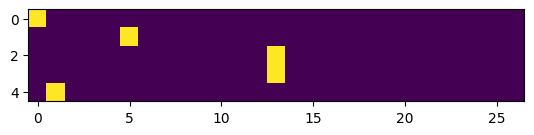

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xenc)

In [ ]:
# what are the initial weights for the neuron
W = torch.randn((27,1))

In [ ]:
W

tensor([[ 2.5392],
        [-0.1753],
        [ 0.8747],
        [-0.6604],
        [ 2.8611],
        [-0.3775],
        [ 0.2980],
        [ 1.6915],
        [ 0.1661],
        [-0.4401],
        [ 0.5906],
        [-1.3598],
        [-1.3202],
        [-0.1002],
        [ 1.0313],
        [-1.0032],
        [ 0.2084],
        [-0.7773],
        [-2.2099],
        [ 0.1356],
        [ 0.4989],
        [ 0.1801],
        [ 0.0301],
        [ 1.2996],
        [ 0.8184],
        [-1.0010],
        [ 0.3535]])

In [ ]:
W = torch.randn((27,1))
xenc @ W

tensor([[-0.8766],
        [-1.0752],
        [-0.8432],
        [-0.8432],
        [-0.1038]])

In [ ]:
# (5, 27) @ (27, 1) dot product (5, 1)

In [ ]:
# 5 activations of this neuron on these 5 inputs
# evaluated all in parallel
# we fed in simultaneously all the 5 inputs

In [ ]:
# single input to single neuron, single activation
xenc[0] @ W

tensor([-0.8766])

In [ ]:
# 5 inputs to single neuron, 5 activations, 1 for each input
xenc @ W

tensor([[-0.8766],
        [-1.0752],
        [-0.8432],
        [-0.8432],
        [-0.1038]])

## Explanation:  Single neuron with weights (W)

1. **Definition of a Neuron**: A neuron is a basic building block of neural networks. It takes one or more inputs, applies a weight to each input, sums the weighted inputs, and then passes the sum through an activation function to produce an output.

2. **Weight Matrix \(W\)**: In the code, you have a weight matrix \(W\) of shape \(27 \times 1\). Each row of this matrix corresponds to a weight associated with a particular character in the input vocabulary.

3. **Input Matrix \(xenc\)**: The input matrix \(xenc\) has been one-hot encoded, which means each row of this matrix represents an input character in a format where only one element is 1 (indicating the presence of the character) and the rest are 0 (indicating the absence of the character). The matrix has shape \(5 \times 27\), corresponding to 5 input characters and 27 possible characters in the vocabulary.

4. **Matrix Multiplication**: The operation \(xenc @ W\) is a matrix multiplication. It multiplies the input matrix \(xenc\) with the weight matrix \(W\) to produce an output matrix of shape \(5 \times 1\). This operation calculates the weighted sum of inputs for each input character.

5. **Output**: The resulting matrix represents the output (also known as activations) of the neuron for each input character. Each element in this matrix corresponds to the output of the neuron for a specific input character. This is the result of evaluating the neuron on the 5 input characters simultaneously.

6. **Parallel Evaluation**: Since the inputs are fed into the neuron simultaneously, the matrix multiplication allows us to compute the outputs in parallel, which can be more efficient than computing them one by one.

To summarize, this code defines a single neuron with weights \(W\). It takes 5 input characters, represented in a one-hot encoded format, and computes the output of the neuron for each input character using matrix multiplication. The output represents the activations of the neuron for each input character. This is done in parallel for all 5 inputs.

In [ ]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.5436,  0.4000, -0.8983,  0.5787, -1.3954, -1.5012,  0.9266, -0.1598,
          0.3028,  1.6622, -0.7582,  0.6804, -1.3113,  0.7485, -0.9420, -1.1925,
          0.7775, -1.1850,  0.1783, -0.0528,  0.9542,  1.3119,  0.1010,  1.1518,
          0.3347,  0.9267, -0.0030],
        [ 0.0452,  0.8436,  0.2099, -0.6964, -0.2445,  0.1827, -0.9503, -1.5473,
         -1.2381, -0.0067, -0.1173, -0.4540,  0.5134, -0.1926, -0.4810,  0.5868,
         -1.0153,  1.2164,  0.8127, -1.6983, -0.1393, -1.5653,  0.6500, -0.7030,
         -0.0024,  1.9544, -1.1859],
        [-0.6580,  1.0054,  0.6433,  2.0007,  0.2147, -0.1760,  0.9988,  0.7172,
         -0.3547,  0.1579,  0.7393, -0.1603, -0.2503, -0.4495, -0.3824,  0.3799,
         -0.2560, -0.9885, -0.6910,  0.4727, -0.2704, -1.4679,  0.9980,  0.3444,
          2.0468, -1.0425, -2.1539],
        [-0.6580,  1.0054,  0.6433,  2.0007,  0.2147, -0.1760,  0.9988,  0.7172,
         -0.3547,  0.1579,  0.7393, -0.1603, -0.2503, -0.4495, -0.3824,  0.3799

In [ ]:
# (5, 27) @ (27, 27) dot product (5, 27)

In [ ]:
(xenc @ W).shape

torch.Size([5, 27])

In [ ]:
# individual calculation of dot product
(xenc @ W)[3,13]

tensor(-0.4495)

In [ ]:

xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
W[:,13]

tensor([ 0.7485, -0.4895, -0.7696, -1.4412,  1.3454, -0.1926, -0.6399, -1.1842,
        -1.7606, -0.8529,  0.3229,  0.8511, -3.2818, -0.4495,  1.5899, -1.6332,
        -0.4364, -2.7047, -1.1353, -3.0854,  1.3822,  0.8943, -0.3202, -1.7449,
        -0.4577,  0.5247,  0.1901])

In [ ]:
# elementwise multiplication and sum it up
(xenc[3] * W[:,13]).sum()

tensor(-0.4495)

## Explanation: Multi-Neuron System

1. **Multi-Neuron System**: In the new code, you've switched from having a single neuron to a system of 27 neurons, each with 27 weights. The weight matrix \(W\) is now of shape \($27 \times 27$\), where each row represents the weights associated with a specific neuron.

2. **Weight Matrix \(W\)**: Each row of the weight matrix \(W\) corresponds to a set of weights for a specific neuron. There are 27 rows, which means there are 27 neurons in this layer, and each neuron has 27 weights corresponding to the 27 possible input characters.

3. **Input Matrix \(xenc\)**: The input matrix \(xenc\) remains the same, with a shape of \($5 \times 27\$). Each row represents a one-hot encoded input character.

4. **Matrix Multiplication**: The operation \(xenc @ W\) is still a matrix multiplication. It multiplies the input matrix \(xenc\) with the weight matrix \(W\) to produce an output matrix of shape \($5 \times 27$\). This operation calculates the weighted sum of inputs for each input character across all neurons.

5. **Output**: The resulting matrix represents the outputs of all 27 neurons for each input character. Each row corresponds to an input character, and each column corresponds to a neuron. So, for example, the element at position (i, j) represents the output of the j-th neuron for the i-th input character.

6. **Parallel Evaluation**: Yes, parallel processing is a key feature of neural networks. Modern neural networks can have millions of parameters and be trained on massive datasets. Being able to process multiple inputs or multiple neurons in parallel significantly speeds up training and inference. This is one of the reasons why GPUs, which are designed for parallel processing, are often used for training and running neural networks.

7. **Multiple Neurons**: Having multiple neurons allows the network to learn more complex patterns and representations in the data. Each neuron can learn to respond to different features in the input, and together they can capture a richer understanding of the data.

To summarize, the new code defines a layer of 27 neurons, each with 27 weights. It takes 5 input characters, represented in a one-hot encoded format, and computes the output of all 27 neurons for each input character using matrix multiplication. The output matrix represents the activations of all neurons for each input character. This is done in parallel for all 5 inputs and all 27 neurons. Parallel processing is a key feature of neural networks that makes them computationally efficient.

## Explanation: Processing data in parallel

1. **Dot Product**: The dot product between two vectors is the sum of the element-wise products of the vectors. In the context of neural networks, it's used to calculate the weighted sum of the inputs for a neuron.

2. **Matrix Multiplication**: Matrix multiplication can be thought of as a series of dot products. When you multiply two matrices, each element in the resulting matrix is the dot product of a row from the first matrix and a column from the second matrix. This operation can be used to compute the weighted sums for multiple neurons and multiple input examples simultaneously.

3. **Batch Processing**: Neural networks often process data in batches, which means that multiple input examples are fed into the network at once. This allows for more efficient computation because the operations can be parallelized.

4. **Neurons and Weights**: Each neuron in a neural network has a set of weights associated with it. The weights determine how much each input feature contributes to the output of the neuron. The weighted sum of the inputs is then passed through an activation function to produce the output of the neuron.

5. **Matrix Representation of Weights**: In a fully connected layer of a neural network, the weights for all the neurons can be represented in a single matrix, where each column corresponds to the weights for a specific neuron.

6. **Efficient Computation**: Matrix multiplication is a very efficient operation, especially on modern hardware like GPUs that are optimized for it. By representing the weights in a matrix and the input examples in another matrix, we can use matrix multiplication to compute the outputs of all the neurons for all the input examples in the batch simultaneously. This is much more efficient than computing them one at a time.

7. **Matrix Multiplication in our Example**: In the code, \(xenc\) is a matrix where each row represents a one-hot encoded input character, and \(W\) is a matrix where each column represents the weights for a neuron. The operation \(xenc @ W\) computes the dot product between each input example and each neuron's weights. The resulting matrix represents the weighted sums (before activation) for each neuron and each input example.

Using matrix multiplication, we can very efficiently evaluate the dot product between lots of input examples in a batch and lots of neurons where all those neurons have weights in the columns of those \(W\)'s.

This ability to process data in parallel and perform efficient computations is one of the key reasons why neural networks are so powerful and versatile.

In [ ]:
W = torch.randn((27,27))
xenc @ W

tensor([[-2.4212, -0.5426, -1.7280,  0.9467, -0.3676, -1.2058, -0.8297,  1.2202,
         -0.2394,  0.9902, -0.0166, -0.3268, -1.9340,  1.9481, -1.3969,  1.8343,
          1.3558,  0.7375,  1.3718,  0.1089,  1.3102,  1.4131, -0.1217, -0.4301,
         -0.4711, -0.0763, -0.6519],
        [-0.8395,  0.1354, -0.3265, -0.6137, -2.1645,  1.2188, -0.6012, -0.2334,
          0.1413, -0.0087, -0.0271,  0.0778,  0.2831,  0.2748, -1.1507,  0.2663,
         -0.4083, -1.4141,  0.1477,  0.0858,  0.6381, -0.3847,  0.8881,  0.5601,
          0.8998,  1.0595, -0.8282],
        [ 0.3255, -0.8238, -0.0985, -0.8890, -1.2165, -0.8277,  0.4725,  0.7730,
          0.1841, -0.5590, -0.2694,  2.0042, -0.7195, -1.0370,  0.7979, -0.8972,
          0.2113, -1.1599,  0.7428,  1.1976, -0.0880, -0.9479,  0.7794,  0.6005,
          0.3533,  0.5767,  0.0509],
        [ 0.3255, -0.8238, -0.0985, -0.8890, -1.2165, -0.8277,  0.4725,  0.7730,
          0.1841, -0.5590, -0.2694,  2.0042, -0.7195, -1.0370,  0.7979, -0.8972

In [ ]:
# exp gives the log counts. negative number are below 1. postive number above 1.
# we can use and interpret these as the equivalent of counts in the N matrix
# probabilies will be these counts normalized
(xenc @ W).exp()

tensor([[0.0888, 0.5812, 0.1776, 2.5773, 0.6924, 0.2995, 0.4362, 3.3877, 0.7871,
         2.6917, 0.9836, 0.7213, 0.1446, 7.0151, 0.2474, 6.2606, 3.8799, 2.0906,
         3.9424, 1.1151, 3.7070, 4.1087, 0.8854, 0.6505, 0.6243, 0.9265, 0.5211],
        [0.4319, 1.1450, 0.7215, 0.5413, 0.1148, 3.3830, 0.5481, 0.7918, 1.1517,
         0.9914, 0.9732, 1.0809, 1.3273, 1.3162, 0.3164, 1.3052, 0.6648, 0.2431,
         1.1591, 1.0896, 1.8929, 0.6806, 2.4305, 1.7508, 2.4592, 2.8850, 0.4368],
        [1.3847, 0.4388, 0.9062, 0.4111, 0.2963, 0.4370, 1.6040, 2.1663, 1.2022,
         0.5718, 0.7638, 7.4199, 0.4870, 0.3545, 2.2209, 0.4077, 1.2353, 0.3135,
         2.1017, 3.3121, 0.9158, 0.3876, 2.1801, 1.8230, 1.4238, 1.7801, 1.0522],
        [1.3847, 0.4388, 0.9062, 0.4111, 0.2963, 0.4370, 1.6040, 2.1663, 1.2022,
         0.5718, 0.7638, 7.4199, 0.4870, 0.3545, 2.2209, 0.4077, 1.2353, 0.3135,
         2.1017, 3.3121, 0.9158, 0.3876, 2.1801, 1.8230, 1.4238, 1.7801, 1.0522],
        [6.9250, 1.3433,

In [ ]:
# exp gives the log counts. negative number are below 1. postive number above 1.
# we can use and interpret these as the equivalent of counts in the N matrix
# probabilies will be these counts normalized
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)
probs

tensor([[0.0018, 0.0117, 0.0036, 0.0520, 0.0140, 0.0060, 0.0088, 0.0684, 0.0159,
         0.0543, 0.0199, 0.0146, 0.0029, 0.1416, 0.0050, 0.1264, 0.0783, 0.0422,
         0.0796, 0.0225, 0.0748, 0.0829, 0.0179, 0.0131, 0.0126, 0.0187, 0.0105],
        [0.0136, 0.0360, 0.0227, 0.0170, 0.0036, 0.1063, 0.0172, 0.0249, 0.0362,
         0.0311, 0.0306, 0.0340, 0.0417, 0.0413, 0.0099, 0.0410, 0.0209, 0.0076,
         0.0364, 0.0342, 0.0595, 0.0214, 0.0764, 0.0550, 0.0773, 0.0906, 0.0137],
        [0.0368, 0.0117, 0.0241, 0.0109, 0.0079, 0.0116, 0.0427, 0.0576, 0.0320,
         0.0152, 0.0203, 0.1974, 0.0130, 0.0094, 0.0591, 0.0108, 0.0329, 0.0083,
         0.0559, 0.0881, 0.0244, 0.0103, 0.0580, 0.0485, 0.0379, 0.0473, 0.0280],
        [0.0368, 0.0117, 0.0241, 0.0109, 0.0079, 0.0116, 0.0427, 0.0576, 0.0320,
         0.0152, 0.0203, 0.1974, 0.0130, 0.0094, 0.0591, 0.0108, 0.0329, 0.0083,
         0.0559, 0.0881, 0.0244, 0.0103, 0.0580, 0.0485, 0.0379, 0.0473, 0.0280],
        [0.1470, 0.0285,

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
# For each of our 5 example we now have a row that came out of a neural network.
# We can interpret the rows as probabilities.

In [ ]:
probs[0]

tensor([0.0018, 0.0117, 0.0036, 0.0520, 0.0140, 0.0060, 0.0088, 0.0684, 0.0159,
        0.0543, 0.0199, 0.0146, 0.0029, 0.1416, 0.0050, 0.1264, 0.0783, 0.0422,
        0.0796, 0.0225, 0.0748, 0.0829, 0.0179, 0.0131, 0.0126, 0.0187, 0.0105])

## Explanation: From the raw outputs of the neurons to the probabilities that we're interested in

1. **Neurons Output Numbers**: Right now, our neurons produce a set of numbers (known as activations) as output. These numbers are computed by taking the dot product of the input vector and the weight vector, followed by an activation function.

2. **Interpretation of Outputs**: However, we want these numbers to represent probabilities, which must be positive and sum to 1. The numbers produced by the neurons don't naturally have these properties.

3. **Log Counts**: One way to handle this is to interpret the output numbers as "log counts." Log counts are the natural logarithms of counts, and they can be positive or negative. This is a useful intermediate step because it's easier to transform log counts into probabilities.

4. **Exponentiation**: To convert log counts into counts, we can use the exponential function. Exponentiating a log count gives us a count that is always positive.

5. **Softmax Function**: To ensure that our counts sum to 1 and thus form a probability distribution, we use the softmax function. The softmax function exponentiates its input (turning log counts into counts) and then normalizes these counts so that they sum to 1.

6. **Probabilities**: After applying the softmax function, we end up with a set of numbers that can be interpreted as probabilities. Each number represents the probability of a particular character being the next character in the sequence.

7. **Final Output**: For each input example, we have a probability distribution over the next character in the sequence. This is what we want to achieve with our neural network.

In summary, the neural network produces a set of numbers as output. We interpret these numbers as log counts, transform them into counts, and then normalize them to form a probability distribution over the next character in the sequence. This step-by-step process is how we go from the raw outputs of the neurons to the probabilities that we're interested in.

## Explanation: The neural network in action

1. **Input Encoding**: The input to the neural network is a character, represented as a one-hot encoded vector. In this case, the character '.' has been encoded into a vector of length 27, where the first element is 1 and all other elements are 0. This vector precisely identifies the character we're dealing with.

2. **Neuron Activations**: We feed this one-hot encoded vector into the neural network. The neurons in the network have weights associated with them, and we calculate the dot product between the input vector and the weights (this is the `xenc @ W` operation). The result of this dot product is a set of numbers (logits), where each number corresponds to the activation of a particular neuron.

3. **Exponentiation**: We exponentiate the logits to get the counts (`logits.exp()`). Exponentiating the logits ensures that we have positive values, as required for counts.

4. **Normalization**: We then normalize the counts so that they sum to 1. This is done by dividing each count by the sum of all counts. The result of this normalization is a set of numbers that can be interpreted as probabilities (`probs`). This is because they are all positive and sum to 1, which are the requirements for a probability distribution.

5. **Interpretation of Outputs**: Each element in the `probs` vector represents the probability that a particular character is the next character in the sequence, given the input character. The neural network has thus transformed our input character into a probability distribution over the next character.

6. **Prediction**: We can use this probability distribution to make predictions about the next character. The character with the highest probability is the neural network's best guess for the next character in the sequence.

7. **Training and Optimization**: During training, we adjust the weights of the neural network to minimize the difference between the predicted probabilities and the actual outcomes (the true next characters). This process, known as backpropagation, is how the neural network learns to make better predictions over time.

In summary, the neural network takes in a one-hot encoded character as input, applies a series of mathematical operations to transform this input into a probability distribution over the next character, and then uses this probability distribution to make predictions. The goal of training is to adjust the neural network's weights so that its predictions become increasingly accurate.

## The forward pass

Here's the seasoned ML practitioner's explanation of the forward pass of the neural network:

1. **Input Encoding:**
   - The input tensor `xs` represents the indices of characters in the sequence. Each index corresponds to a character in the vocabulary.
   - We need to convert these indices into a format that can be fed into the neural network. For this, we use one-hot encoding. In one-hot encoding, each index is transformed into a binary vector where only the corresponding index is set to 1, and all other entries are set to 0. This gives us the `xenc` tensor.

2. **Neural Network Weights:**
   - The neural network has a weight matrix `W`, which represents the parameters of the network. Each neuron has a set of weights corresponding to the inputs it receives.
   - In this network, there are 27 neurons (one for each character in the vocabulary), and each neuron receives 27 inputs (one for each character in the one-hot encoding).
   - The weight matrix `W` is randomly initialized.

3. **Forward Pass:**
   - The forward pass is the process of computing the output of the neural network given the input. In this case, the input is the one-hot encoded characters `xenc`.
   - We multiply the input `xenc` by the weight matrix `W` to get the `logits`. This is a linear transformation, and it represents the raw predictions of the network.
   - The `logits` represent the log-counts of the bigrams. They are unnormalized and can have any real values.

4. **Softmax Transformation:**
   - The softmax transformation converts the unnormalized `logits` into a probability distribution over the possible next characters.
   - First, we take the exponential of the `logits` to get the `counts`. This ensures that all values are positive.
   - Then, we normalize the `counts` by dividing each row by the sum of the row. This gives us the `probs` tensor, which represents the probabilities of each next character given the current character.
   - Each row of the `probs` tensor is a probability distribution that sums to 1.

The output of the forward pass is the `probs` tensor, which contains the predicted probabilities for the next character in the sequence given the current character. This is what the neural network predicts based on its current weights. In the training process, we will adjust the weights to minimize the difference between these predictions and the actual next characters in the sequence.

In [ ]:
# SUMMARY --------------
xs


tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts (muliply in the first layer)
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
## Loss function is negative log likelihood

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('one-hot encoded:', xenc[i])
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
one-hot encoded: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
one-hot encoded: tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289,

In [ ]:
# Getting the negative log likelihood

# ys = tensor([ 5, 13, 13,  1,  0])
# we are interested in probs[0,5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]
# we want a more efficient way than this
probs[0,5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [ ]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [ ]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [ ]:
probs[torch.arange(5), ys].log()

tensor([-4.3993, -4.0146, -3.6234, -2.6081, -4.2012])

In [ ]:
probs[torch.arange(5), ys].log().mean()

tensor(-3.7693)

In [ ]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

## Reminder of micrograd

```
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

```

# Optimization I

In [ ]:
# ----------- OPTIMIZATION ---------------

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# we now have full forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts (muliply in the first layer)
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

3.7693049907684326


In [ ]:
# backward pass
W.grad = None
loss.backward()

In [ ]:
W.shape

torch.Size([27, 27])

In [ ]:
W.grad.shape

torch.Size([27, 27])

In [ ]:
# update
W.data += -0.1 * W.grad

In [ ]:
# recalulate forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts (muliply in the first layer)
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

3.7492127418518066


Let's go through the code and discuss the shape of the tensors at each step of the process, to help build up a clear intuition of how the neural network works.

1. **Dataset Creation**: The code first creates a dataset of input-output pairs based on the words from the dataset. Each pair consists of two characters, where the first character is the input and the second character is the output.
```python
xs = torch.tensor(xs) # Shape: [num,]
ys = torch.tensor(ys) # Shape: [num,]
num = xs.nelement()   # Number of examples
```
Here, `num` represents the total number of character pairs in the dataset. Both `xs` and `ys` are 1-D tensors with a shape of `[num,]`.

2. **Network Initialization**: The code initializes the weights `W` of the network. The network has 27 neurons (one for each character in the alphabet plus the '.'), and each neuron has 27 weights (one for each character in the alphabet plus the '.').
```python
W = torch.randn((27, 27), generator=g, requires_grad=True)
```
Here, `W` is a 2-D tensor with a shape of `[27, 27]`.

3. **Gradient Descent**: The code performs gradient descent optimization for 50 iterations.

  - **Forward Pass**:
    1. **One-Hot Encoding**: The input characters `xs` are one-hot encoded to create `xenc`.
    ```python
    xenc = F.one_hot(xs, num_classes=27).float() # Shape: [num, 27]
    ```
    Here, `xenc` is a 2-D tensor with a shape of `[num, 27]`.
    2. **Dot Product**: The dot product between the one-hot encoded input `xenc` and the weights `W` produces `logits`.
    ```python
    logits = xenc @ W # Shape: [num, 27]
    ```
    Here, `logits` is a 2-D tensor with a shape of `[num, 27]`.
    3. **Exponential**: The exponential of `logits` produces `counts`.
    ```python
    counts = logits.exp() # Shape: [num, 27]
    ```
    Here, `counts` is a 2-D tensor with a shape of `[num, 27]`.
    4. **Softmax**: The `counts` are normalized to produce `probs`.
    ```python
    probs = counts / counts.sum(1, keepdims=True) # Shape: [num, 27]
    ```
    Here, `probs` is a 2-D tensor with a shape of `[num, 27]`.
  - **Loss Computation**: The negative log-likelihood loss is computed.
  - **Backward Pass**: The gradients of the loss with respect to the weights `W` are computed.
  - **Weight Update**: The weights `W` are updated using the computed gradients.

At each step of the process, the shape of the tensors involved is highlighted in the comments. In summary, the input-output pairs are transformed from 1-D tensors to 2-D tensors through one-hot encoding, then processed through the neural network to produce probability distributions over the next character in the sequence. The weights of the network are optimized to minimize the loss using gradient descent. The parallel processing of multiple examples is a key feature of neural networks, allowing for efficient training on large datasets.

# Optimization II

In [ ]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(50):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50.0 * W.grad

3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448


In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
pxzfay.
a.
nn.


## Understanding the Linear Layer and its Relation to Bigram Counts

In our neural network, the operation `logits = xenc @ W` is a matrix multiplication between the one-hot encoded input, `xenc`, and the weight matrix, `W`. This operation is equivalent to selecting a row from the weight matrix `W` corresponding to the input character.

Let's break it down: when we one-hot encode the input character, we create a vector where only one element is 1, and all the others are 0. When we perform matrix multiplication with the weight matrix `W`, the result is the same as selecting the row from `W` corresponding to the position where the element is 1 in the one-hot encoded vector.

In our count-based bigram model, we populated the matrix `N` with the counts of bigrams from the training data. In the gradient-based neural network framework, we initialized the weight matrix `W` randomly and let the loss guide us during optimization. After optimization, the operation `W.exp()` produces a matrix that is equivalent to the counts-based matrix `N`.

The process of optimization in the neural network is guided by the loss function, which measures the difference between the predicted probabilities and the true labels. By iteratively updating the weight matrix `W` using gradient-based optimization, we arrive at a matrix that approximates the bigram counts observed in the training data.

In summary, both the count-based bigram model and the neural network bigram model use a matrix to represent the relationships between characters. The count-based model populates this matrix directly from the training data, while the neural network model learns the matrix through optimization. After optimization, the matrix in the neural network model is equivalent to the counts-based matrix, representing the same bigram probabilities.

## Building upon a Simple Neural Network for Language Modeling

In our current implementation, we have a simple neural network that consists of a single linear layer followed by a softmax activation. This network models the bigram probabilities of our dataset. The network has one parameter tensor, \(W\), which holds the weights of the linear layer. Our loss function is the negative log-likelihood, the same as in our previous non-neural network, count-based bigram model.

The primary advantage of using a neural network approach is that it allows for iterative improvement and scaling of the model. We can build upon this basic architecture by incorporating multiple previous characters as input, increasing the complexity of the network, and adding additional layers. As we progress towards more complex models, such as recurrent neural networks (RNNs) and transformers, the core machinery for training and optimization will remain similar. The forward pass of the network may become more intricate, but the fundamental concepts of computing the loss, performing backpropagation, and updating the weights will stay consistent.

The output of our neural network, the logits, are the raw, unnormalized scores produced by the linear layer. These logits are transformed into probabilities through the softmax activation, which ensures that the probabilities sum to one. The logits play a crucial role in the computation of the loss and the subsequent optimization of the model parameters.

As we continue to develop more advanced neural network models for language modeling, we will encounter architectures that can capture longer-range dependencies in the text and provide more powerful representations of the data. Nonetheless, the foundation we have established with our simple neural network will serve as the basis for these more sophisticated models. The process of training and optimizing these models will build upon the concepts we have already introduced.

# Glossary


## Difference between `torch.Tensor` and `torch.tensor`

`torch.Tensor` is a class, whereas `torch.tensor` is a function. They both create tensors, but there are some differences in their behavior and use cases.

1. `torch.Tensor` (class constructor):
   - It creates an uninitialized tensor of the specified size.
   - The data type of the tensor is inferred from the default data type (`torch.get_default_dtype()`), which is initially set to `torch.float32`.
   - It is often used when you need a tensor of a specific size but don't have the data yet.

   Example:

   ```python
   a = torch.Tensor(2, 3) # Creates an uninitialized tensor of size (2, 3)
   ```

2. `torch.tensor` (function):
   - It creates a tensor from the provided data (e.g., a list, a NumPy array, or another tensor).
   - The data type of the tensor is inferred from the input data, or you can explicitly set it using the `dtype` argument.
   - It is often used when you already have the data and want to create a tensor with that data.

   Example:

   ```python
   data = [1, 2, 3]
   b = torch.tensor(data) # Creates a tensor with the data from the list
   ```

In general, you should use `torch.tensor` when you have the data available and want to create a tensor with that data. Use `torch.Tensor` when you need to create an uninitialized tensor of a specific size. However, for most use cases, `torch.tensor` is the preferred way to create tensors as it provides more control over the data type and other attributes of the tensor.

## One-hot encoding
The reason we don't just feed integers into a neural network when dealing with categorical variables, like characters in a text, is that neural networks are better at interpreting data that is represented in a continuous, rather than discrete, format. When we feed integers into a neural network, the network may assume that there is a natural order to the categories, which is not true in the case of characters in a text.

One-hot encoding is a common way to transform categorical variables into a format that can be provided to a machine learning algorithm. In one-hot encoding, we convert each integer into a binary vector with all zero values except for the index of the integer, which is marked with a 1.

For example, in our case, we have 27 characters (including the special character `.`). Each character is represented by an integer index. The one-hot encoding process will convert each integer index into a binary vector of length 27, with a 1 at the position corresponding to the integer index and 0s elsewhere.

This transformation makes it easier for the neural network to understand the categorical data. Instead of dealing with integers, the network will now process vectors where each character is distinctly represented. The network will not assume any order or hierarchy among the characters, and will be able to learn the relationships between them more effectively.

In the code provided, the `F.one_hot` function from PyTorch is used to perform one-hot encoding on the integer indices in `xs`, resulting in a tensor `xenc` of shape `(5, 27)`. Each row in `xenc` is a one-hot encoded vector representing a character from the word `'emma'`.

## Dot Product

1. **Definition of Dot Product**: The dot product, also known as scalar product or inner product, is a mathematical operation that takes two equal-length sequences of numbers (usually coordinate vectors) and returns a single number. The dot product of two vectors is obtained by multiplying corresponding entries and then summing those products.

2. **Dot Product Formula**: If we have two vectors \( $\mathbf{a} = [a_1, a_2, ..., a_n] $\) and \( $\mathbf{b} = [b_1, b_2, ..., b_n] $\), their dot product is calculated as:
$$
\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + \ldots + a_n \cdot b_n
$$

3. **Example with Two Vectors**: Let's take two vectors \( $\mathbf{a} = [2, 3]$ \) and \( $\mathbf{b} = [4, 5] $\). The dot product of these vectors is:
$$
\mathbf{a} \cdot \mathbf{b} = (2 \cdot 4) + (3 \cdot 5) = 8 + 15 = 23
$$

4. **Dot Product with Matrices**: The dot product concept can be extended to matrices. When you multiply two matrices, you're taking the dot product of the rows of the first matrix with the columns of the second matrix. This is known as matrix multiplication.

5. **Example with Two Matrices**: Let's multiply two matrices \( A \) and \( B \):
$$
A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}, \quad B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}
$$
To get the element at the first row and first column of the resulting matrix, we take the dot product of the first row of \( A \) with the first column of \( B \):
$$
(1 \cdot 5) + (2 \cdot 7) = 5 + 14 = 19
$$
We do this for every combination of rows from \( A \) and columns from \( B \) to get the resulting matrix:
$$
AB = \begin{pmatrix} 19 & 22 \\ 43 & 50 \end{pmatrix}
$$

The dot product is a fundamental operation in linear algebra and has applications in various fields, including machine learning, physics, and engineering.

## Logits (or log-odds) and log-counts

Logits (or log-odds) and log-counts are related concepts, but they are used in different contexts. Let's explore each one:

1. **Logits (log-odds):**
   - The term "logit" is often used in the context of logistic regression and refers to the natural logarithm of the odds of an event happening.
   - In a binary classification problem, the odds of an event happening are given by \( \frac{p}{1-p} \), where \( p \) is the probability of the event.
   - The logit is calculated as \( $\text{logit}(p) = \log\left(\frac{p}{1-p}\right)$ \).
   - This transformation is used because it converts the probability domain \([0, 1]\) into a real number domain \($(-\infty, +\infty)$\), making it easier to model linear relationships.

2. **Log-counts:**
   - In the context of natural language processing and machine learning, the term "log-counts" often refers to the natural logarithm of the raw counts of events or features.
   - Taking the logarithm of counts is a common transformation used to reduce the impact of extreme values and to make the data more suitable for certain algorithms.
   - For example, in text classification or sentiment analysis, the raw term frequencies in documents can be transformed into log-counts to reduce the influence of very frequent words and to stabilize the variance.

In the context of your bigram language model, if you're referring to "log-counts", it could mean taking the logarithm of the raw bigram counts in your data. This transformation might be useful for certain analyses or modeling approaches.

## Softmax function

The softmax function is a mathematical tool that's often used in machine learning, particularly in classification problems. In simple terms, it takes a vector of real numbers and transforms it into a probability distribution. This is useful because we often want our models to output probabilities, which can be interpreted and used for decision-making.

Here's a step-by-step explanation of how the softmax function works:

1. **Input**: The input to the softmax function is a vector of real numbers (often called logits). Each element of this vector corresponds to a particular category or class.

2. **Exponentiation**: The softmax function exponentiates each element of the input vector. This ensures that all the elements are positive, as probabilities must be positive.

3. **Normalization**: The softmax function then divides each exponentiated element by the sum of all the exponentiated elements. This ensures that the resulting probabilities sum to 1, which is a requirement for a probability distribution.

4. **Output**: The output is a vector of probabilities, one for each category or class. These probabilities tell us how likely each category is given the input data.

The softmax function is useful because it allows us to convert the raw output of a machine learning model (which can be any real numbers) into a probability distribution, which is easier to interpret and work with. It's especially useful in classification problems where we want to know the likelihood of each possible category or class.

## Optimizing a Neural Network

The process of training a neural network involves finding the optimal weights that minimize the loss function. Here is a step-by-step breakdown of how a seasoned machine learning practitioner would optimize a neural network:

1. **Initialization**: Start with an initial guess for the weights of the neural network. These weights can be initialized randomly or using some predefined method.

2. **Forward Pass**: Input data is passed through the network, layer by layer, until the final output layer is reached. The raw output of the network is then transformed (e.g., through the softmax function) to produce a probability distribution over the possible classes.

3. **Compute Loss**: Compare the predicted probabilities with the true labels using a loss function. This function quantifies how well the network's predictions match the actual data. The goal of optimization is to minimize this loss.

4. **Backpropagation**: Compute the gradients of the loss with respect to the weights. This involves applying the chain rule of calculus to find how much each weight contributed to the loss. This process is known as backpropagation because it works backward from the output layer to the input layer.

5. **Update Weights**: Adjust the weights in the direction that reduces the loss. This is typically done using an optimization algorithm like gradient descent or one of its variants. The optimizer uses the gradients computed during backpropagation to update the weights.

6. **Iterate**: Repeat steps 2-5 for a number of epochs or until the loss stops decreasing.

The key idea behind optimizing a neural network is to iteratively adjust the weights based on the computed gradients, which indicate the direction and magnitude of the changes needed to minimize the loss. This process leverages the fact that all operations in the loss computation are differentiable, making it possible to use gradient-based optimization techniques.

## Regularization in Machine Learning

Regularization is a crucial concept in machine learning, especially in training neural networks. It helps prevent overfitting, which occurs when a model is too complex and fits the training data too closely, capturing noise and outliers rather than the underlying pattern. Overfit models tend to perform poorly on unseen data.

Regularization techniques add a penalty to the loss function, discouraging the model from becoming too complex. The penalty term is usually a function of the model's parameters (weights and biases) and encourages the model to have smaller parameter values, leading to a simpler model.

In our neural network, we use L2 regularization, which is also known as weight decay or ridge regression. The regularization term is the sum of the squared values of the model's parameters, scaled by a regularization coefficient (0.01 in our case). The equation for the loss with regularization is:

$$
\text{loss} = -\text{probs}[torch.arange(num), ys].log().mean() + 0.01 \cdot (W^2).mean()
$$

The first term is the negative log likelihood loss, which measures the model's performance on the training data. The second term is the L2 regularization, which discourages the model from having large parameter values.

The regularization coefficient (0.01) determines the strength of the regularization. A higher value will put more emphasis on the regularization term, leading to a simpler model, while a lower value will put more emphasis on fitting the training data.

Regularization helps to find a balance between fitting the training data and preventing overfitting. By adding a penalty to the loss function, regularization encourages the model to be simpler, which often leads to better generalization on unseen data.

In summary, regularization is an essential technique in machine learning for preventing overfitting and improving model generalization. It works by adding a penalty to the loss function, encouraging the model to be simpler by having smaller parameter values.

## Regularization: Intuition and Connection to Smoothing

Regularization is a crucial concept in machine learning that helps to prevent overfitting by discouraging overly complex models. In the context of our simple neural network, we use L2 regularization, which adds a penalty term to the loss function based on the squared values of the model's parameters.

Let's break down the intuition behind this:

1. **Initial Conditions**: If we initialize the weights \(W\) of the neural network to zero, all the logits (i.e., the outputs of the linear layer) will be zero. When we exponentiate these logits using the `exp` function, we get 1 for all entries. Consequently, when we normalize to get the probabilities, they will be uniformly distributed.

2. **Uniform Probabilities**: When all the weights \(W\) are equal, the resulting probabilities for the next character in the sequence will be uniform. In other words, the model will assign equal probabilities to all possible next characters.

3. **Incentivizing Near-Zero Weights**: Regularization works by adding a penalty term to the loss function that incentivizes the weights to be near zero. In our case, we use L2 regularization, which adds a term proportional to the sum of the squared values of the weights.

4. **Gravity Towards Zero**: You can think of regularization as a gravitational force that pulls the weights towards zero. The strength of this force is determined by the regularization coefficient. The higher the coefficient, the stronger the force pulling the weights towards zero.

5. **Connection to Smoothing**: In our counts-based bigram model, we used smoothing by adding a constant to the counts to avoid zero probabilities. This smoothing is equivalent to the regularization in our neural network model. The strength of the regularization is akin to adding more counts in the counts-based model.

6. **Balancing Act**: The optimization process now has two competing objectives. On the one hand, it tries to adjust the weights to make the predicted probabilities match the observed data. On the other hand, it tries to keep the weights close to zero due to the regularization term.

7. **Regularization as a Smoothness Constraint**: By incentivizing the weights to be near zero, regularization acts as a smoothness constraint on the model. It prevents the model from fitting the training data too closely, which can lead to overfitting. The optimization becomes a balancing act between fitting the data and keeping the model smooth and simple.

In summary, regularization is a technique that helps prevent overfitting by adding a penalty term to the loss function, encouraging the model's weights to be near zero. This is conceptually similar to the smoothing we used in the counts-based bigram model. The strength of the regularization determines the balance between fitting the training data and keeping the model smooth and simple.